In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%run -i helper_functions.py

## Load cleaned data set

In [3]:
df = pd.read_csv('./output/cleaned_loan_data.csv', low_memory=False)
df.shape

(1786867, 28)

## Exploratory Data Analysis

In [4]:
# Print all unique values for each column
print_unique_values(df)

acc_now_delinq: [ 0.  1.  2.  3.  5.  4.  6. 14.]
application_type: ['Individual' 'Joint App']
emp_length: [ 4  2 10  3  5  6  1  7  0  9  8]
grade: ['B' 'A' 'C' 'D' 'E' 'F' 'G']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']
inq_last_6mths: [1. 2. 0. 3. 4. 5. 6. 7. 8.]
loan_status: ['Fully Paid' 'Non-Performing']
pub_rec_bankruptcies: [ 0.  1.  2.  4.  3.  8.  5.  6.  7. 12.  9. 11.]
purpose: ['debt_consolidation' 'home_improvement' 'other' 'credit_card'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational']
term: [36 60]
verification_status: ['Not Verified' 'Source Verified' 'Verified']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   acc_now_delinq        float64
 1   addr_state            object 
 2   annual_inc            float64
 3   application_type      object 
 4   avg_cur_bal           float64
 5   bc_util               float64
 6   delinq_2yrs           float64
 7   dti                   float64
 8   emp_length            int64  
 9   emp_title             object 
 10  fico_range_high       float64
 11  fico_range_low        float64
 12  grade                 object 
 13  home_ownership        object 
 14  inq_last_6mths        float64
 15  installment           float64
 16  int_rate              float64
 17  issue_d               object 
 18  loan_amnt             float64
 19  loan_status           object 
 20  pub_rec               float64
 21  pub_rec_bankruptcies  float64
 22  purpose               object 
 23  revol_b

### Loan Volume Amount by State

Number of unique values: 51


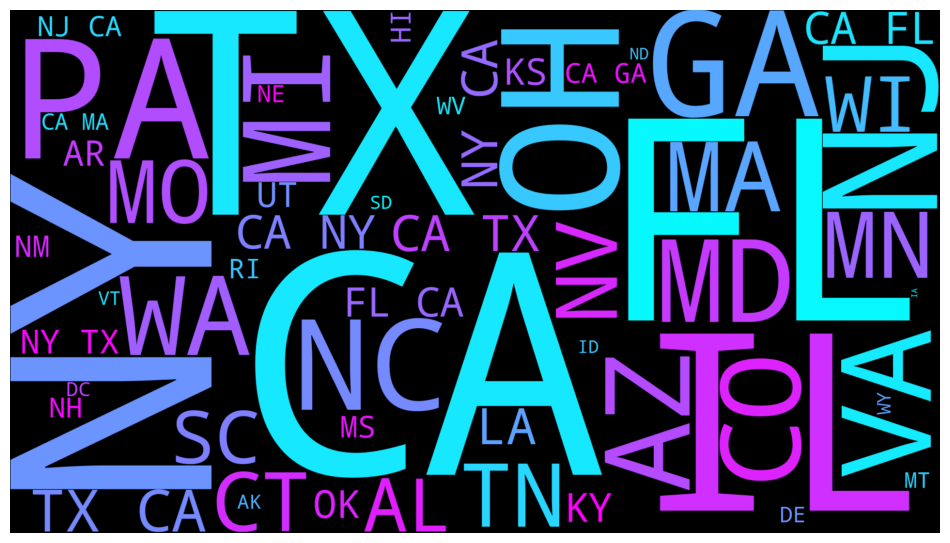

In [6]:
create_wordcloud(df['addr_state'])

In [7]:
# Total 'loan_amnt' by 'addr_state'
total_loan_amnt_by_state = df.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False)

In [8]:
# Add a column for % of total loan amount by state
total_loan_amnt_by_state = pd.DataFrame(total_loan_amnt_by_state)
total_loan_amnt_by_state['% of Total Loan Amount'] = (total_loan_amnt_by_state['loan_amnt'] / total_loan_amnt_by_state['loan_amnt'].sum()) * 100
total_loan_amnt_by_state

,loan_amnt,% of Total Loan Amount
addr_state,,
CA,3.801519e+09,14.432589
TX,2.276880e+09,8.644249
NY,2.108731e+09,8.005867
FL,1.816250e+09,6.895452
IL,1.054630e+09,4.003936
NJ,9.954676e+08,3.779325
GA,8.697208e+08,3.301923
PA,8.619431e+08,3.272395
OH,8.210676e+08,3.117210


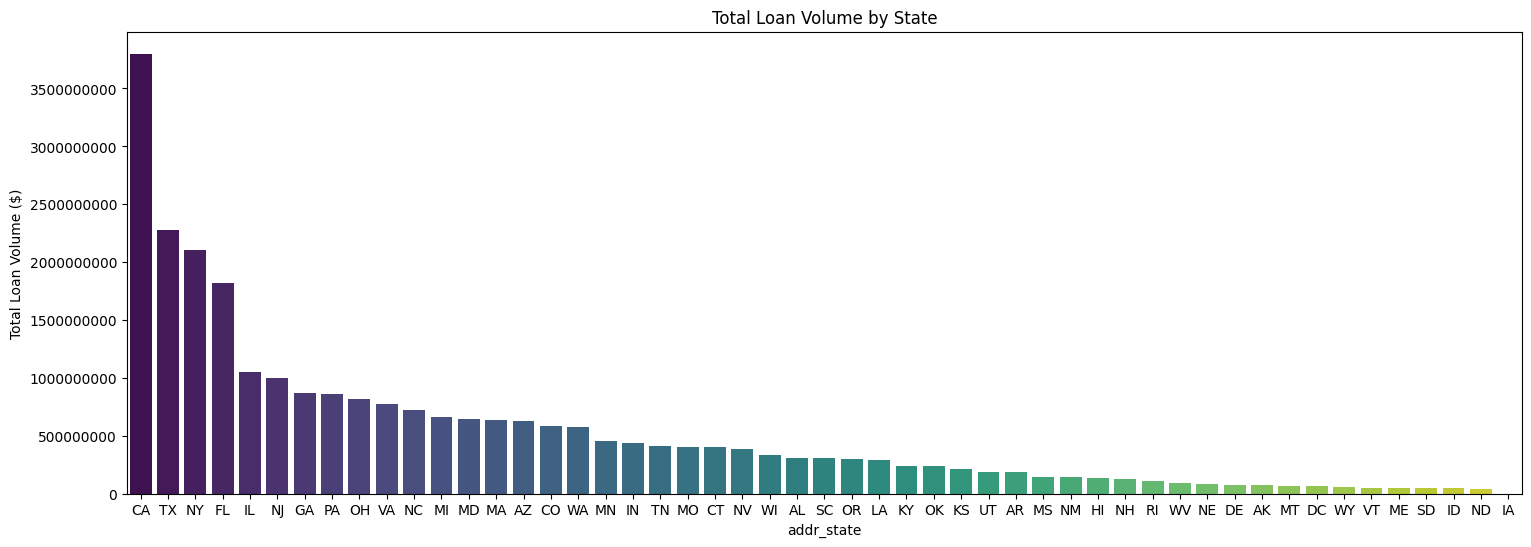

In [8]:
# Plot total 'loan_amnt' by 'addr_state'
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='addr_state', y='loan_amnt', hue='addr_state', data=pd.DataFrame(total_loan_amnt_by_state), palette='viridis')

# Add space to left most bar
#plt.xlim(-1, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
#for container in ax.containers:
#    ax.bar_label(container, fmt='${:,.2f}')

plt.title('Total Loan Volume by State')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

### Loan Volume Amount by Purpose

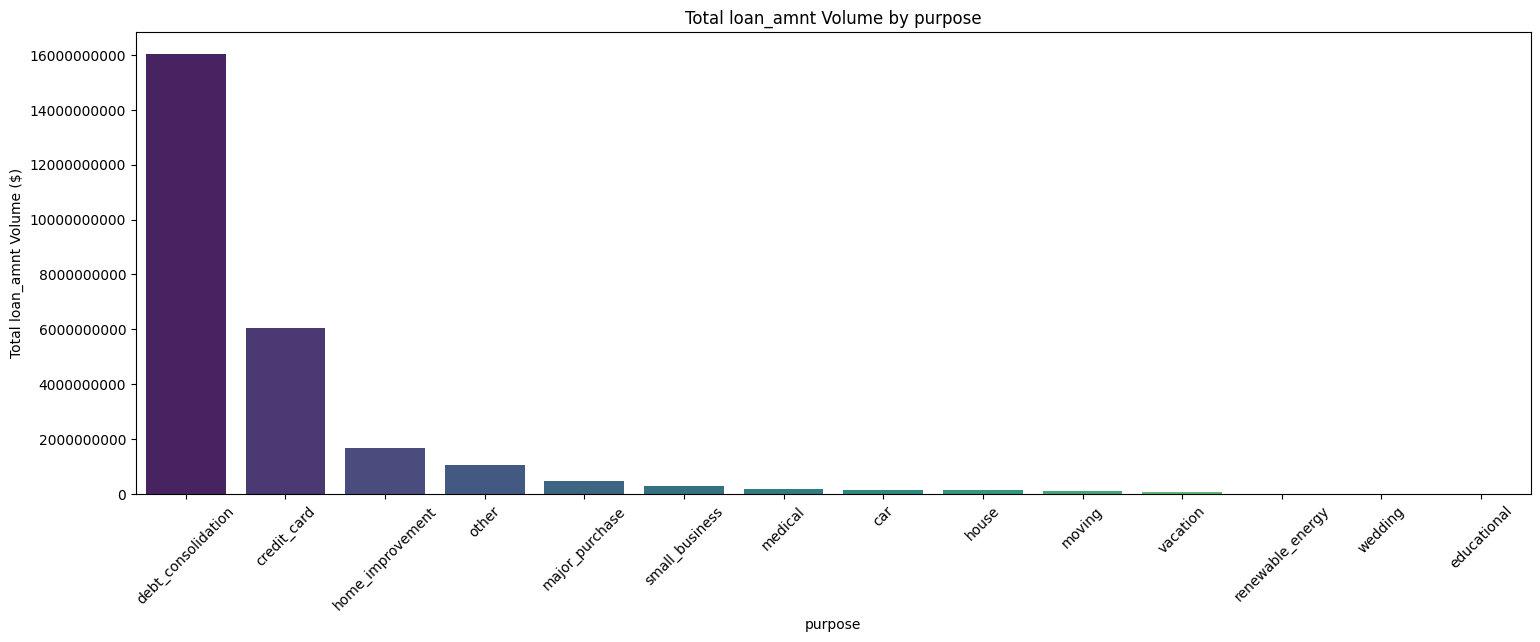

In [9]:
plot_Atotals_vs_B(df, 'loan_amnt', 'purpose', rotation=45)

### Employment Titles

Let's plot the wordcloud for employment titles

Number of unique values: 355970


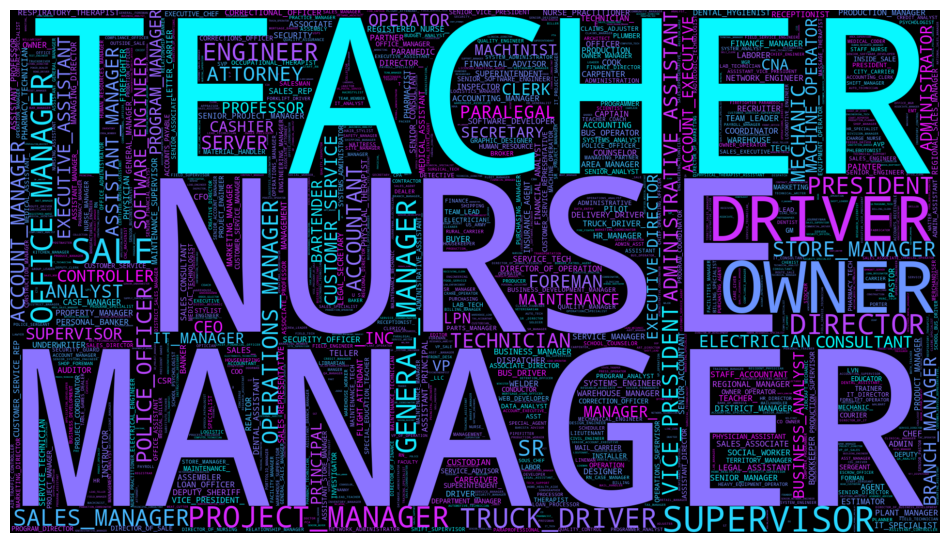

In [10]:
create_wordcloud(df['emp_title'])

#### Control the number of employee titles to work with

In [11]:
NUM_OF_TOP_EMP_TITLES = 20

In [12]:
top_emp_titles = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index
df_top_emp_titles = df[df['emp_title'].isin(top_emp_titles)]

In [13]:
df_top_emp_titles.sample(10)

,acc_now_delinq,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,delinq_2yrs,dti,emp_length,emp_title,...,loan_amnt,loan_status,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,verification_status
1486379,0.0,NY,1008000.0,Individual,19062.0,47.6,0.0,2.57,8,TEACHER,...,12000.0,Fully Paid,0.0,0.0,credit_card,15186.0,0.571,A2,36,Source Verified
1482204,0.0,CA,103000.0,Individual,7882.0,82.2,0.0,15.37,10,NURSE,...,20000.0,Fully Paid,0.0,0.0,credit_card,18633.0,0.773,C2,36,Verified
850081,0.0,TX,55000.0,Individual,14903.0,42.4,0.0,17.70,3,PROJECT_MANAGER,...,15000.0,Fully Paid,0.0,0.0,credit_card,18627.0,0.399,B2,36,Not Verified
1485397,0.0,CA,56000.0,Individual,2529.0,23.2,0.0,14.20,8,STORE_MANAGER,...,4000.0,Non-Performing,0.0,0.0,debt_consolidation,1858.0,0.200,C3,36,Not Verified
34816,0.0,KS,40410.0,Individual,4597.0,99.1,1.0,27.32,9,TEACHER,...,8725.0,Fully Paid,1.0,1.0,debt_consolidation,3468.0,0.482,B5,36,Verified
1083098,0.0,MA,52000.0,Individual,1081.0,91.0,0.0,28.16,1,DRIVER,...,20725.0,Fully Paid,0.0,0.0,debt_consolidation,22718.0,0.730,E1,36,Verified
1120645,0.0,CA,160000.0,Individual,34994.0,17.5,0.0,3.31,7,SALES_MANAGER,...,15000.0,Fully Paid,0.0,0.0,debt_consolidation,20606.0,0.401,A5,60,Source Verified
1528224,0.0,CA,60000.0,Individual,32556.0,87.5,0.0,26.12,10,OWNER,...,19350.0,Fully Paid,1.0,0.0,debt_consolidation,35221.0,0.883,C2,36,Verified
1507734,0.0,GA,96000.0,Individual,9560.0,25.4,0.0,14.79,8,TEACHER,...,32000.0,Fully Paid,0.0,0.0,home_improvement,5704.0,0.241,C2,36,Verified
1049820,0.0,VA,50000.0,Individual,13415.0,27.9,0.0,24.34,2,OPERATIONS_MANAGER,...,10000.0,Fully Paid,0.0,0.0,credit_card,7080.0,0.215,B3,36,Not Verified


In [14]:
df_top_emp_titles['emp_title'].value_counts()

emp_title
TEACHER               36462
NURSE                 36171
MANAGER               35176
OWNER                 23590
DRIVER                16865
SUPERVISOR            15189
SALES                 14539
OFFICE_MANAGER        10539
PROJECT_MANAGER       10517
GENERAL_MANAGER        9795
TRUCK_DRIVER           8899
DIRECTOR               7619
PRESIDENT              7056
ENGINEER               7027
SALES_MANAGER          6424
OPERATIONS_MANAGER     6107
POLICE_OFFICER         5642
STORE_MANAGER          5437
VICE_PRESIDENT         5352
ACCOUNTANT             5201
Name: count, dtype: int64

In [15]:
# Top 20 employment titles as a percentage of total records
print(f'Top 20 employment titles as a percentage of total records: {df_top_emp_titles["emp_title"].value_counts().sum()/len(df)*100}%')

Top 20 employment titles as a percentage of total records: 15.31210772821928%


In [16]:
# Compute and print the mean loan amount for each of the top employment titles
print(df_top_emp_titles.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False))

# Print the mean loan amount for df_top_emp_titles
print(f'Mean loan amount for top {NUM_OF_TOP_EMP_TITLES} employment titles: {df_top_emp_titles["loan_amnt"].mean()}')

emp_title
VICE_PRESIDENT        21293.432362
PRESIDENT             20753.245465
DIRECTOR              19611.684604
SALES_MANAGER         17588.912671
ENGINEER              17197.964992
PROJECT_MANAGER       17183.605116
GENERAL_MANAGER       16886.860643
POLICE_OFFICER        16784.349521
OWNER                 16598.997457
OPERATIONS_MANAGER    16461.482725
NURSE                 16113.016643
MANAGER               15245.874318
STORE_MANAGER         14578.393415
ACCOUNTANT            14507.825418
SALES                 14482.894284
SUPERVISOR            14157.622292
TEACHER               14137.734491
TRUCK_DRIVER          14136.366446
DRIVER                13287.883190
OFFICE_MANAGER        13221.531929
Name: loan_amnt, dtype: float64
Mean loan amount for top 20 employment titles: 15645.629954642973


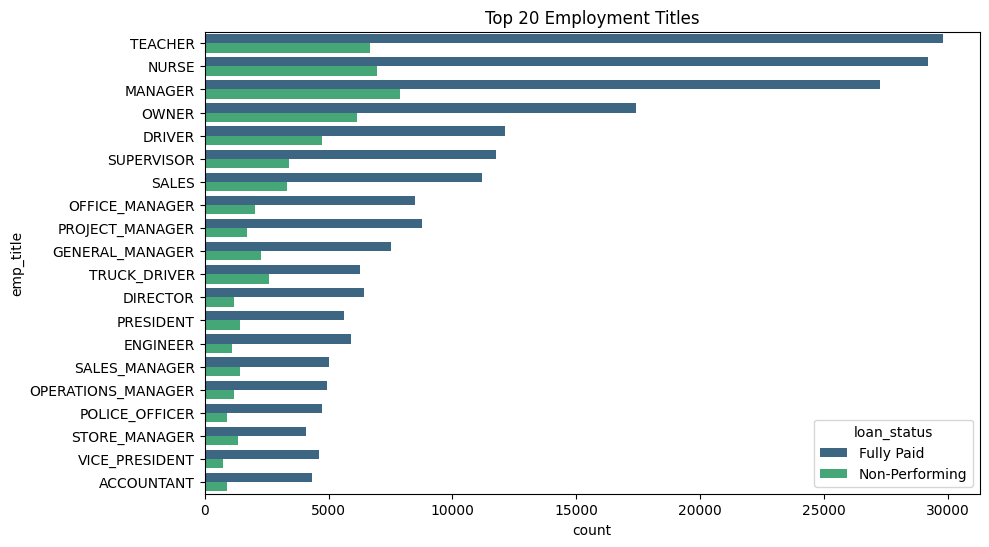

In [17]:
# Plot the top 'emp_title' values against loan_status
plt.figure(figsize=(10, 6))
#ax = sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')
ax = sns.countplot(y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')

#plt.xticks(rotation=90)
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


loan_status         Fully Paid  Non-Performing     ratio
emp_title                                               
ACCOUNTANT            0.830225        0.169775  0.204493
DIRECTOR              0.845518        0.154482  0.182707
DRIVER                0.718292        0.281708  0.392191
ENGINEER              0.840899        0.159101  0.189203
GENERAL_MANAGER       0.766207        0.233793  0.305130
MANAGER               0.775330        0.224670  0.289774
NURSE                 0.807664        0.192336  0.238139
OFFICE_MANAGER        0.805295        0.194705  0.241782
OPERATIONS_MANAGER    0.806943        0.193057  0.239245
OWNER                 0.738872        0.261128  0.353414
POLICE_OFFICER        0.840659        0.159341  0.189542
PRESIDENT             0.799036        0.200964  0.251508
PROJECT_MANAGER       0.836075        0.163925  0.196065
SALES                 0.771442        0.228558  0.296273
SALES_MANAGER         0.780199        0.219801  0.281724
STORE_MANAGER         0.750230 

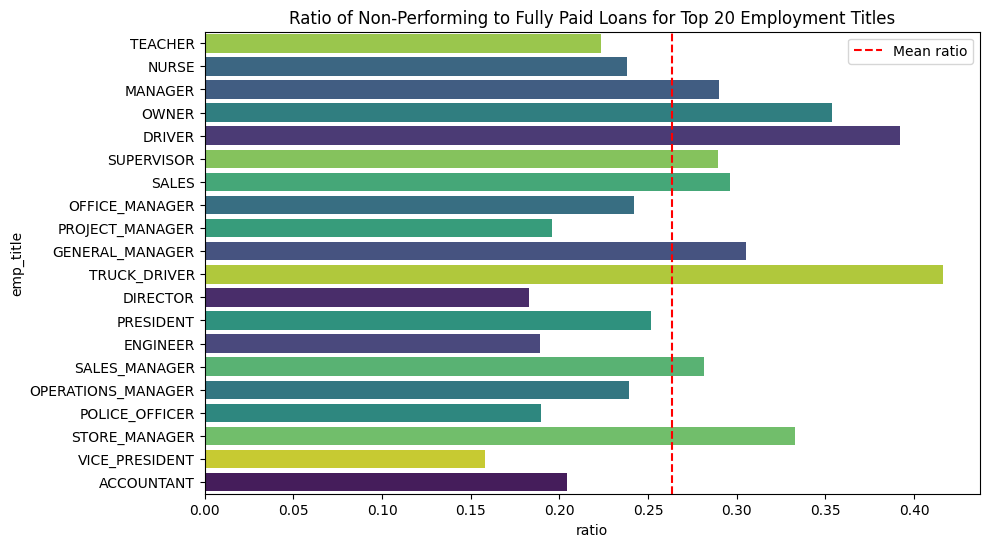

In [18]:
# Get the top 'emp_title' values, then compute the ratio of Non-Current loans to Current loans
#top_emp_title = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index

#emp_title_ratio = df[df['emp_title'].isin(top_emp_title)].groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio = df_top_emp_titles.groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio['ratio'] = emp_title_ratio['Non-Performing'] / emp_title_ratio['Fully Paid']
print(emp_title_ratio)

mean_ratio = emp_title_ratio['ratio'].mean()
print(f"Mean ratio: {mean_ratio}")

# Plot the ratio of Non-Current loans to Current loans for the top 10 'emp_title' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='ratio', 
    y=emp_title_ratio.index,
    hue=emp_title_ratio.index,
    data=emp_title_ratio,
    order=df_top_emp_titles['emp_title'].value_counts().index,
    palette='viridis')

# Add the mean ratio to the plot
plt.axvline(mean_ratio, color='red', linestyle='--', label='Mean ratio')
plt.legend()

plt.title('Ratio of Non-Performing to Fully Paid Loans for Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


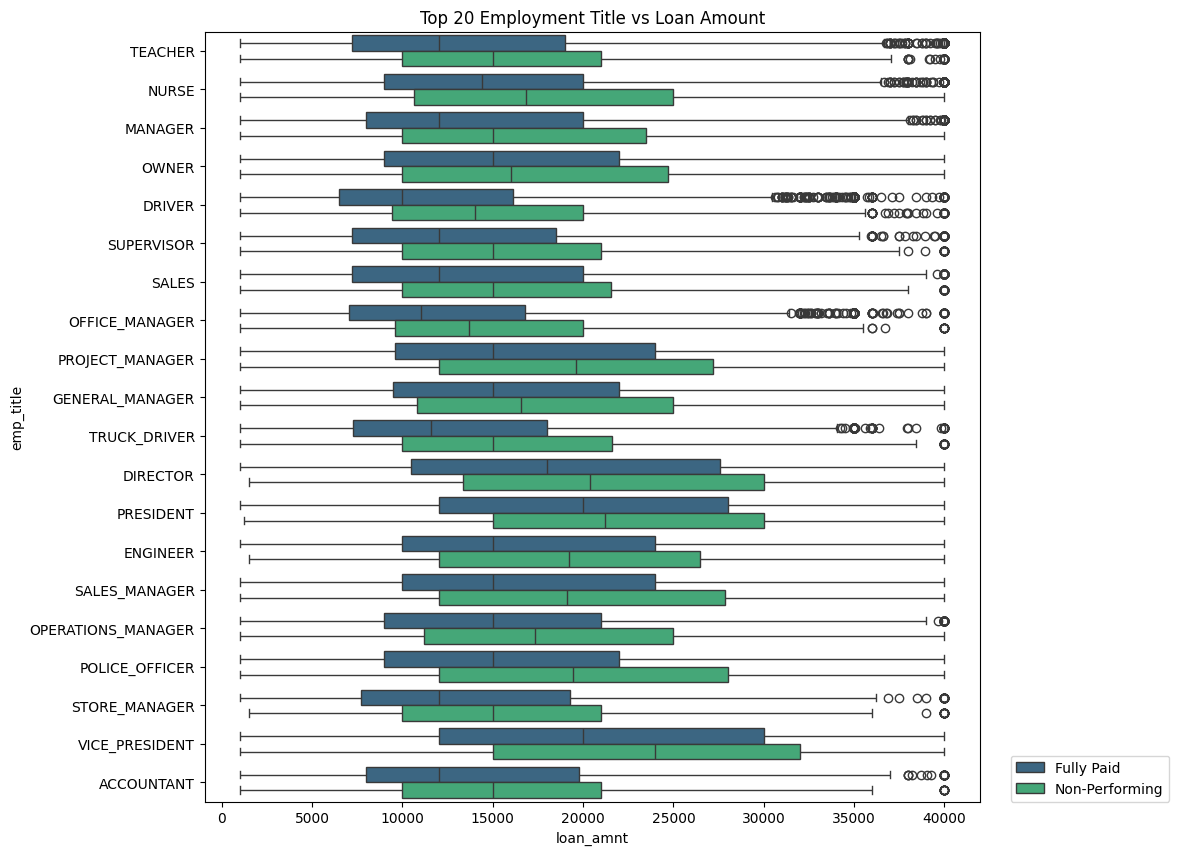

In [19]:
# Plot disitribution of top 'emp_title' against loan_amount
plt.figure(figsize=(10, 10))
sns.boxplot(x='loan_amnt', y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, hue='loan_status', palette='viridis')
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Title vs Loan Amount')
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_amnt.png', dpi=300, bbox_inches='tight')
plt.show()


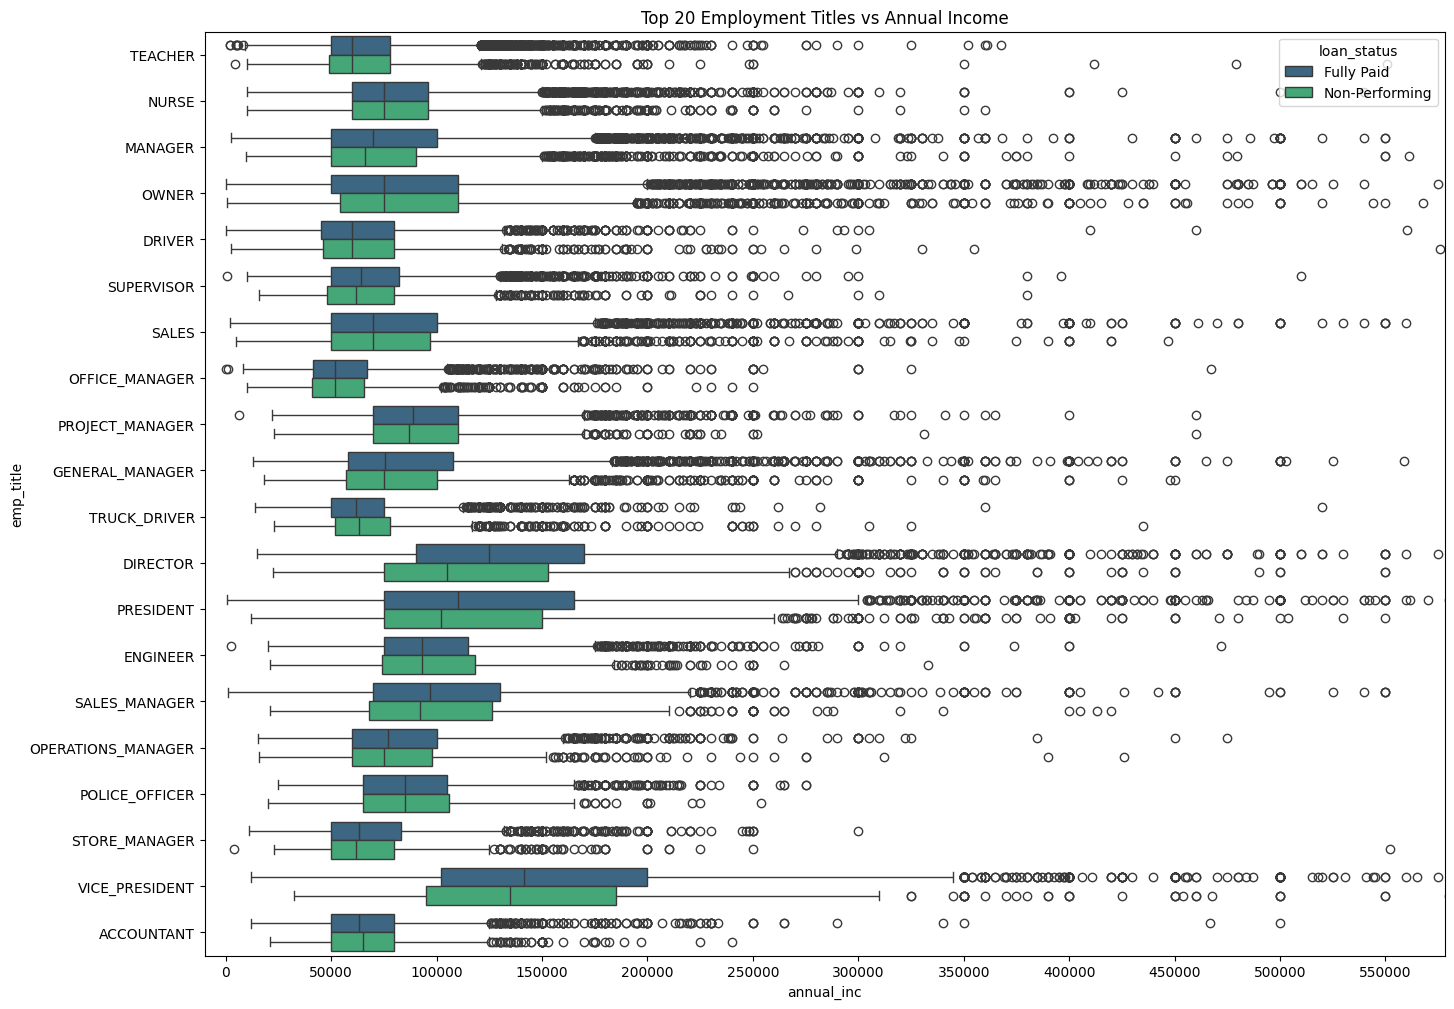

In [20]:
# Plot disitribution of top 'emp_title' against annual_inc
plt.figure(figsize=(16, 12))
sns.boxplot(x='annual_inc', y='emp_title', hue='loan_status', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, palette='viridis')
# Set the x-axis limit to $578,126 (starting for 37% tax bracket), adding padding to the left
plt.xlim(-10000, 578126)
plt.xticks(np.arange(0, 600000, 50000))

#plt.subplots_adjust(right=2)

plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles vs Annual Income')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_annual_inc2.png', dpi=300, bbox_inches='tight')
plt.show()

### Loan Grade

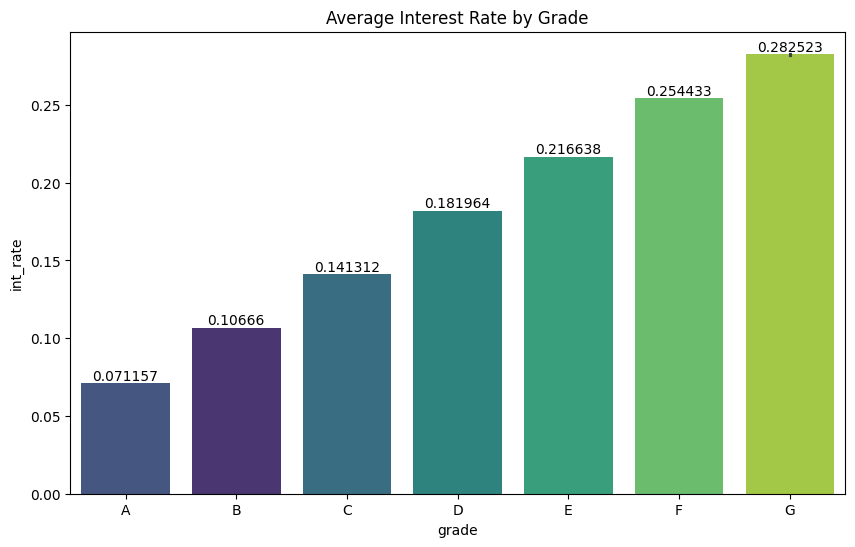

In [21]:
# Plot average interest rate by grade
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='grade', y='int_rate', hue='grade', data=df, estimator='mean', order=sorted(df['grade'].unique()), palette='viridis')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Interest Rate by Grade')
plt.savefig('./output/avg_int_rate_by_grade.png', dpi=300, bbox_inches='tight')
plt.show()


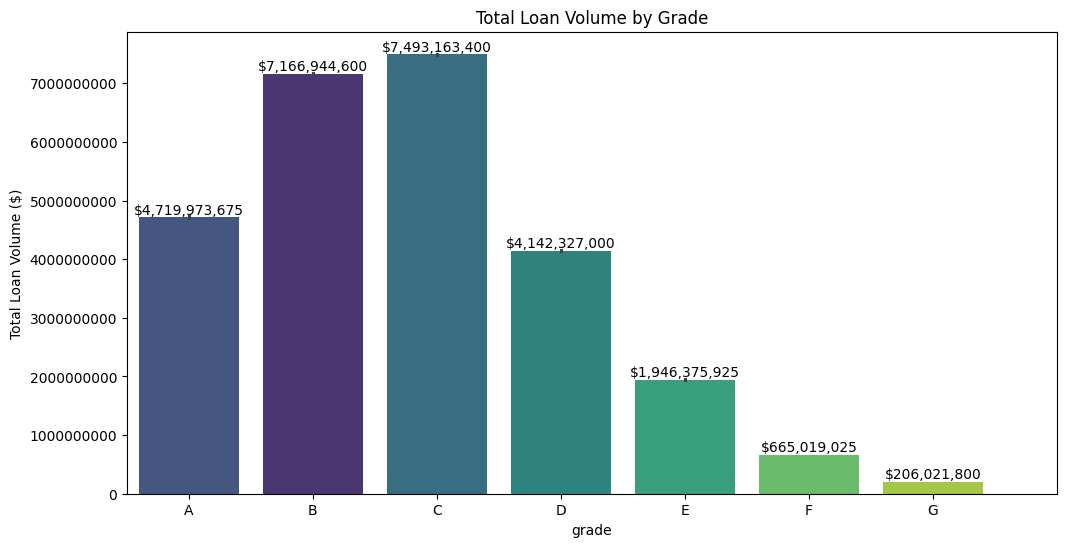

In [22]:
# Plot total 'loan_amnt' by grade
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='grade', y='loan_amnt', hue='grade', data=df, estimator='sum', order=sorted(df['grade'].unique()), palette='viridis')

# Add space to left most bar
plt.xlim(-0.5, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}')
plt.title('Total Loan Volume by Grade')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_grade.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Engineering

### FICO scores

In [23]:
# Create a new column 'fico_avg' that averages 'fico_range_low' and 'fico_range_high'
df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2
df['fico_avg'].unique()

array([722. , 757. , 732. , 707. , 672. , 762. , 662. , 747. , 717. ,
       667. , 692. , 677. , 687. , 702. , 712. , 697. , 682. , 787. ,
       727. , 752. , 802. , 777. , 767. , 742. , 737. , 792. , 772. ,
       782. , 797. , 807. , 812. , 817. , 832. , 822. , 842. , 847.5,
       827. , 837. ])

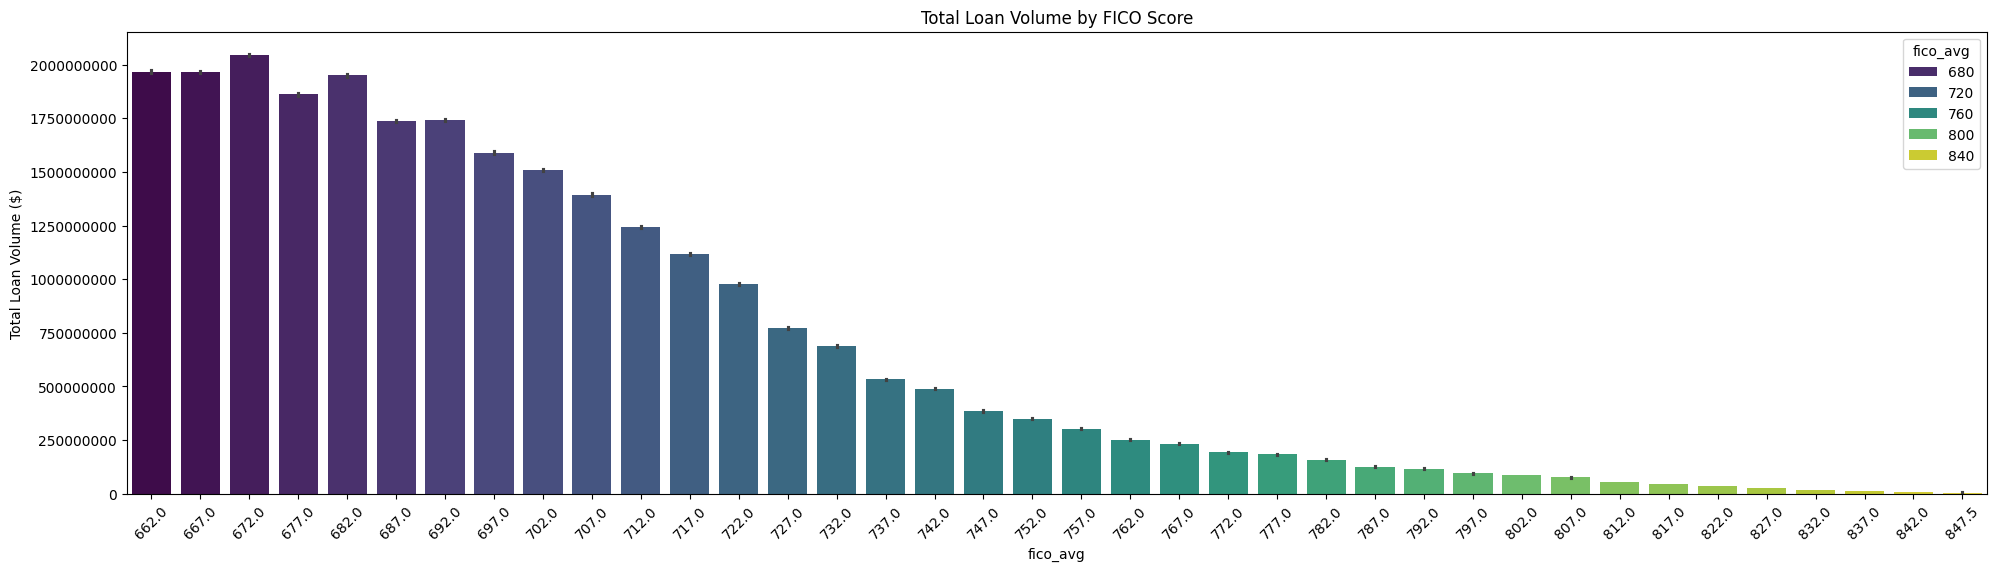

In [24]:
# Plot 'average 'fico_avg' by 'loan'
plt.figure(figsize=(24, 6))
ax = sns.barplot(x='fico_avg', y='loan_amnt', hue='fico_avg', data=df, estimator='sum', order=sorted(df['fico_avg'].unique()), palette='viridis')

# Add space to left most bar
#plt.xlim(-0.5, 7)

# Add more margin between each bar
plt.subplots_adjust(wspace=.75)

# Add labels to each bar, format y-axis in millions
#for container in ax.containers:
#    ax.bar_label(container, fmt='${:,.0f}')

# Set x-ticks staggered
plt.xticks(rotation=45)

plt.title('Total Loan Volume by FICO Score')
# Set y-label
plt.ylabel('Total Loan Volume ($)')

# Show y-axis in plain format (without scientific notation)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('./output/total_loan_vol_by_fico.png', dpi=300, bbox_inches='tight')
plt.show()

### Impute missing values

Based on the distribution of loan_status for each value of inq_fi, we update inq_fi=-1 to be the value with the closest percentage of 'Current'.


In [25]:
# Set inq_fi = -1 to 1
#df['inq_fi'] = df['inq_fi'].replace(-1, 6.0)

In [26]:
# print the percentage loan_status for each value in inq_last_12m
#print_loan_status_percentage(df, 'inq_last_12m')

We do the same for `inq_last_12m`

In [27]:
# Set inq_last_12m = -1 to 9.0
#df['inq_last_12m'] = df['inq_last_12m'].replace(-1, 9.0)

In [28]:
# Binary encode 'application_type'
df['application_type'] = df['application_type'].astype(str).replace(
    {
        'Individual': 1,
        'Joint App': 0
    }
).infer_objects(copy=False)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_23918/3520989426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type'] = df['application_type'].astype(str).replace(


## Target encoding of categorical features
https://www.blog.trainindata.com/target-encoder-a-powerful-categorical-encoding-method/

### Encode loan `grade`

In [29]:
# Encode 'grade' to ordinal values
df['grade'] = df['grade'].astype(str).replace(
    {
        'A': 0,
        'B': 1,
        'C': 2,
        'D': 3,
        'E': 4,
        'F': 5,
        'G': 6
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_23918/258190725.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].astype(str).replace(


In [30]:
# Encode 'verification_status' to ordinal values
df['verification_status'] = df['verification_status'].astype(str).replace(
    {
        'Not Verified': 0,
        'Source Verified': 1,
        'Verified': 2
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_23918/3755547314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].astype(str).replace(


In [31]:
# One hot encode 'home_ownership'
df = pd.get_dummies(df, columns=['home_ownership'])


In [32]:
# One hot encode 'purpose'
df = pd.get_dummies(df, columns=['purpose'])


In [33]:
# Binary encode 'loan_status'
df['loan_status'] = df['loan_status'].astype(str).replace(
    {
        'Fully Paid': 1,
        'Non-Performing': 0
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_23918/3789975610.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].astype(str).replace(


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 47 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   acc_now_delinq              float64
 1   addr_state                  object 
 2   annual_inc                  float64
 3   application_type            int64  
 4   avg_cur_bal                 float64
 5   bc_util                     float64
 6   delinq_2yrs                 float64
 7   dti                         float64
 8   emp_length                  int64  
 9   emp_title                   object 
 10  fico_range_high             float64
 11  fico_range_low              float64
 12  grade                       int64  
 13  inq_last_6mths              float64
 14  installment                 float64
 15  int_rate                    float64
 16  issue_d                     object 
 17  loan_amnt                   float64
 18  loan_status                 int64  
 19  pub_rec              

In [35]:
df['loan_status'].value_counts(normalize=True)

loan_status
1    0.796257
0    0.203743
Name: proportion, dtype: float64

### Clean-up

In [36]:
# Drop features no longer needed after EDA
df.drop(['addr_state', 'emp_title', 'fico_range_low', 'fico_range_high'], axis=1, inplace=True)

## Save engineered data to disk

In [37]:
# Save the cleaned data to a new csv file
df.to_csv('./output/engineered_loan_data.csv', index=False)

### Sample a small percentage for exploration

In [38]:
# Sample 10% of the data while retaining the same distribution of loan_status
#df_sampled = df_pruned.sample(frac=0.05, replace=False, random_state=42, weights = df_pruned.groupby('loan_status')['loan_status'].transform('count'))
#df_sampled['loan_status'].value_counts(normalize=True)

df_sampled = df

In [39]:
df_sampled.shape

(1786867, 43)

In [40]:
skip_plot_features = [
    'acc_now_delinq',
    'emp_title',
    'sub_grade',
    'inq_fi',
    'inq_last_6mths',
    'inq_last_12m',
    'int_rate',
    'issue_d', 
    'last_credit_pull_d',
    'mort_acc',
    'revol_util'
]

Number of columns to plot: 43
Skipping acc_now_delinq
Skipping inq_last_6mths
Skipping int_rate
Skipping issue_d
Skipping revol_util
Skipping sub_grade


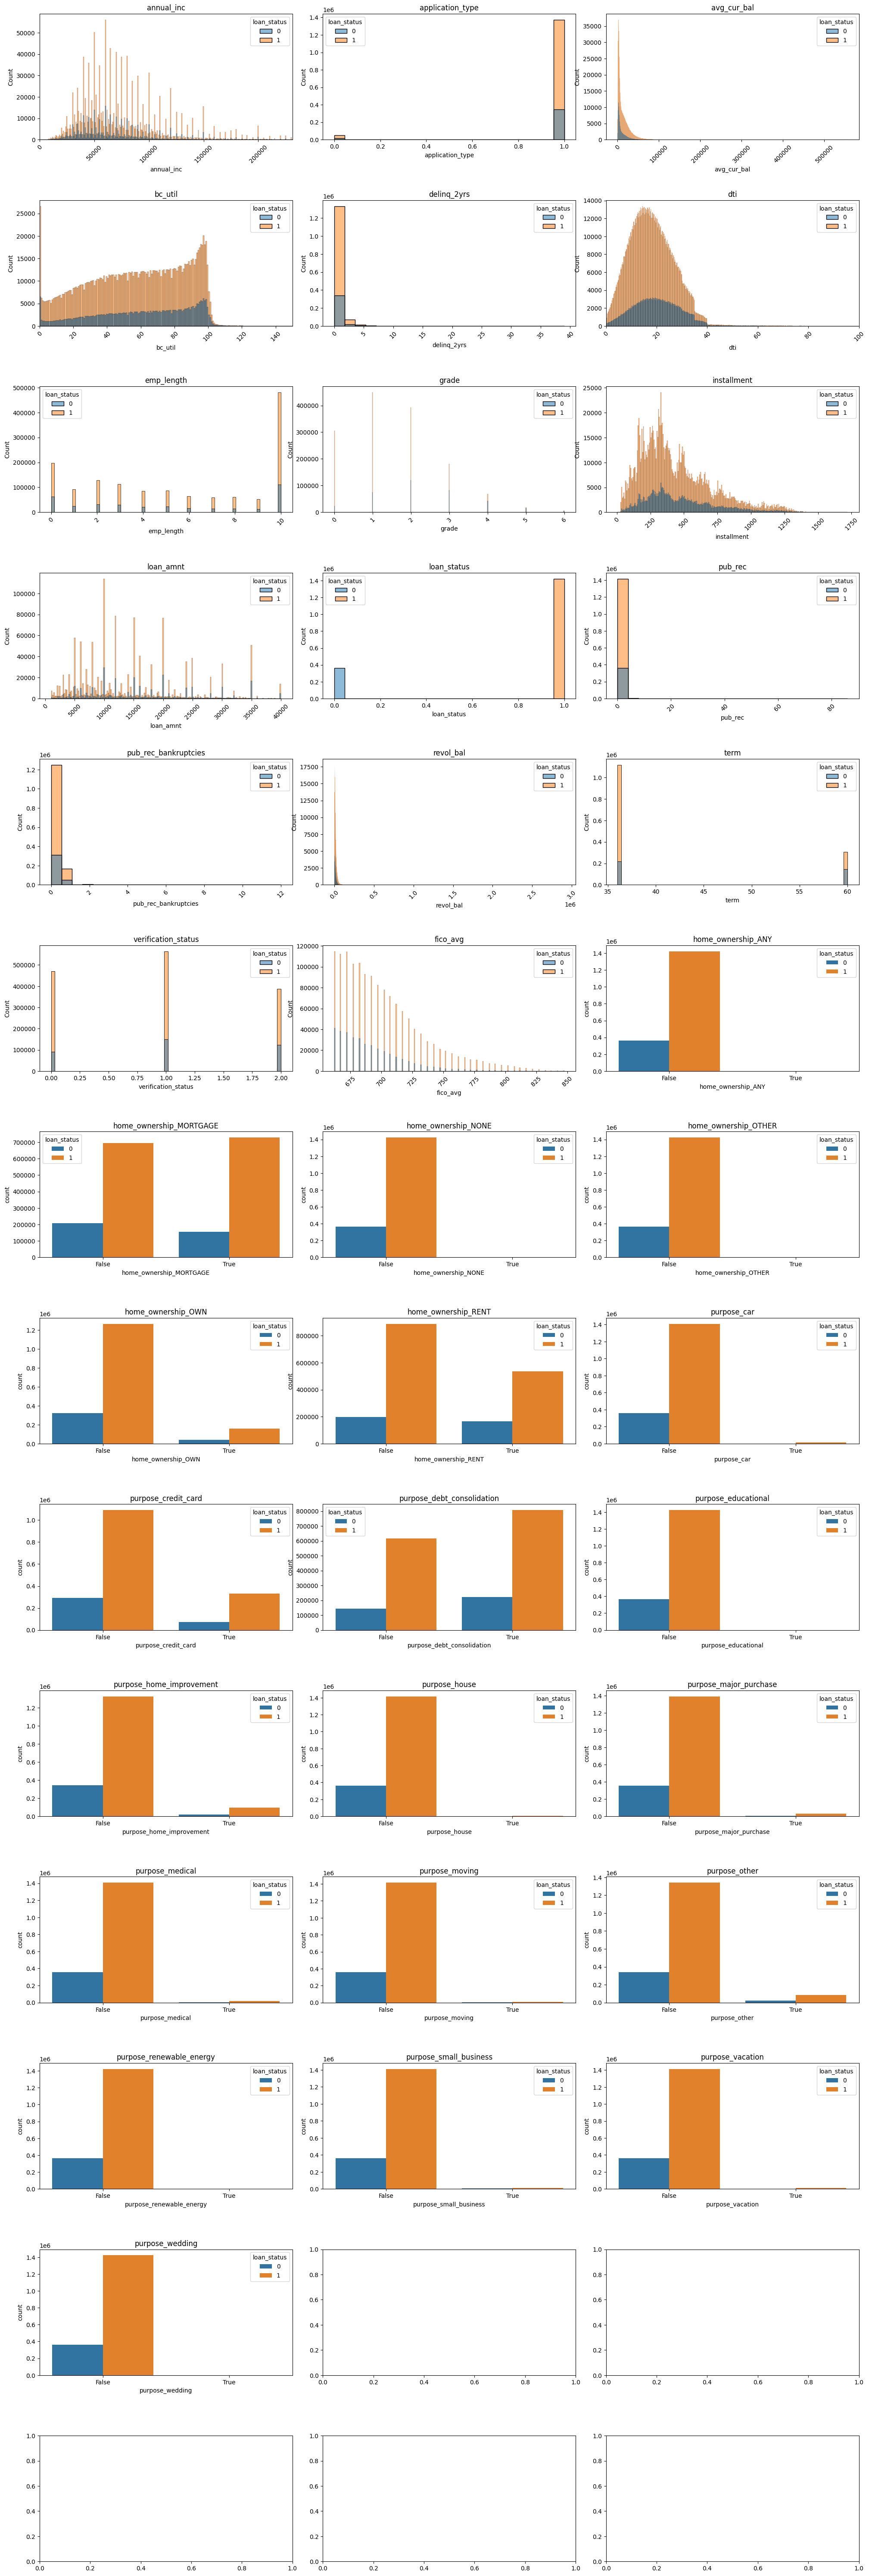

In [41]:
# Number of columns we will be plotting
n_cols = df_sampled.shape[1]
print(f'Number of features to plot: {n_cols}')

# Create a grid of subplots with size (20, 60).  Grid should have 3 columns and the number of rows should be calculated based on the number of columns in the dataframe
plt.subplots(n_cols//3, 3,figsize=(20,60))

# Add margins between each subplot
plt.tight_layout(pad=2.0, h_pad=8.0, w_pad=2.0)

col_idx = 0

# Loop through each column in the dataframe
for col in df_sampled.columns:

    if col in skip_plot_features:
        print(f'Skipping {col}')
        continue

    # Plot in the ith position
    plt.subplot(n_cols//3, 3,col_idx+1)

    # if col is numeric
    if df_sampled[col].dtype in ['int64', 'float64']:
        if col == 'annual_inc':
            # Set the x-axis limit to $231,250 (35% tax bracket)
            plt.xlim(0, 231250)
        if col == 'bc_util':
            # Set the x-axis limit to 150%
            plt.xlim(0, 150)
        if col == 'dti':
            # Set the x-axis limit to 100%
            plt.xlim(0, 100)
        # if col has 'last_fico' in its name
        if 'last_fico' in col:
            # Set the x-axis limit to 850
            plt.xlim(475, 850)
        sns.histplot(x=df_sampled[col], hue=df_sampled['loan_status'])

    else:

        sns.countplot(x=col, hue='loan_status', data=df_sampled)
    
    # if col has more than 4 unique values
    if len(df_sampled[col].unique()) > 4:
        if col == 'addr_state':
            # Rotate the xticks
            plt.xticks(rotation=90)
        else:
            # Rotate the xticks
            plt.xticks(rotation=45)
        
    # Add a title to the plot
    plt.title(col)
    col_idx += 1

plt.savefig('./output/eda.png', dpi=300, bbox_inches='tight')
plt.show()

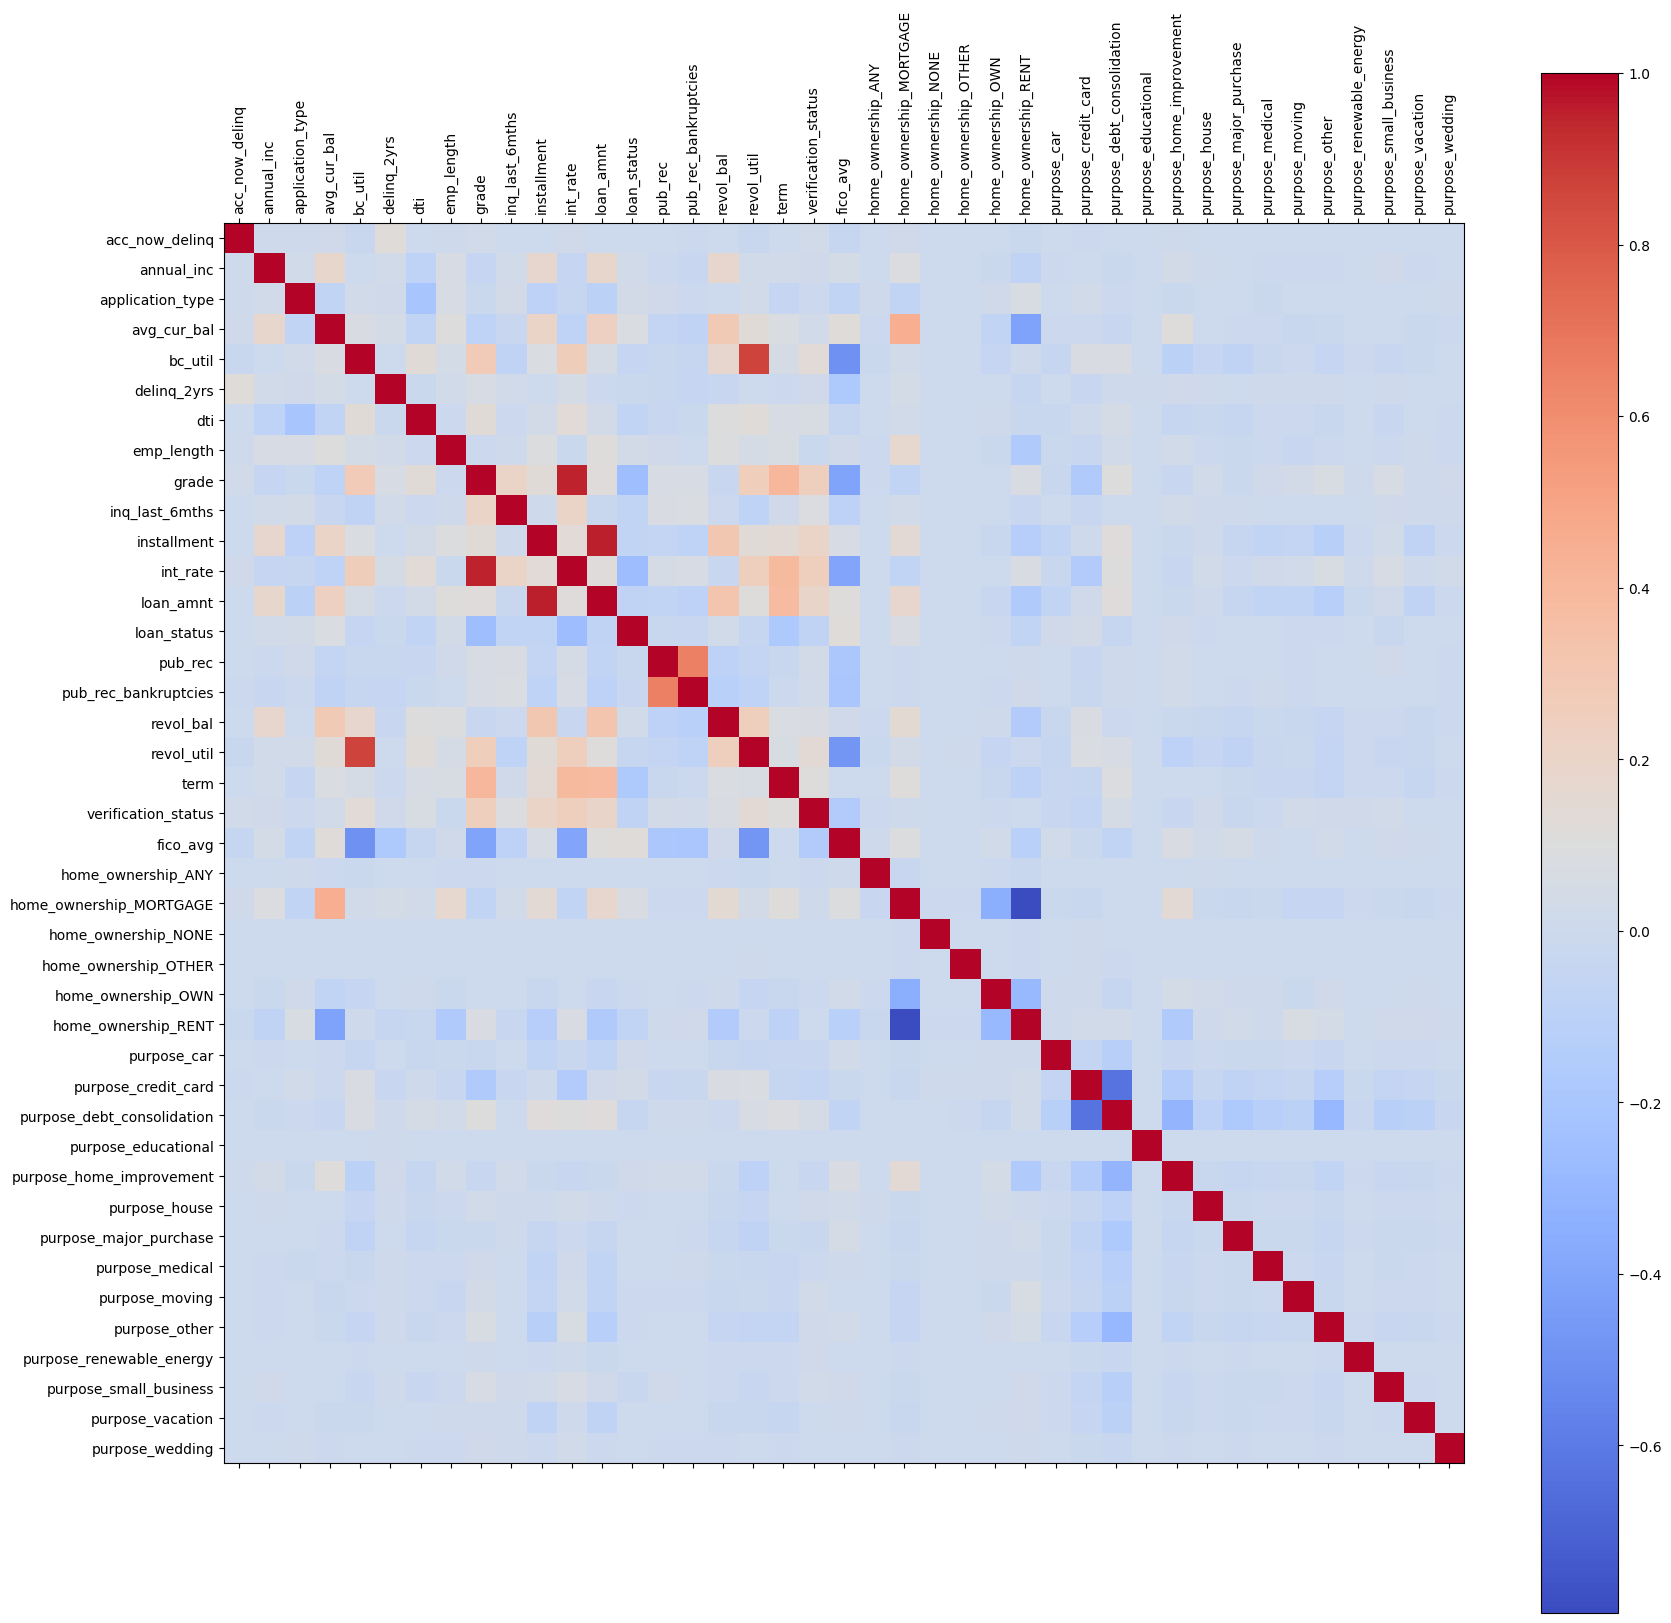

In [42]:
plot_corr(df_sampled.select_dtypes(include=['int64', 'float64', 'bool']), size=20)